# Data Exploration

In [897]:
import numpy as np
import pandas as pd

In [898]:
df = pd.read_csv("Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [899]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [900]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [901]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [902]:
categorical = df.columns[df.dtypes == 'object']
numerical = df.columns[df.dtypes != 'object']

In [903]:
categorical

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [904]:
numerical

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [905]:
for x in categorical[1:]:
    print(f"{x}: {df[x].unique()}\n")

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']



In [906]:
df.shape

(7043, 21)

In [907]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [908]:
df['TotalCharges'].iloc[488]

' '

In [909]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', str(pd.to_numeric(df['TotalCharges'].replace(' ', '0'), downcast='float', errors='coerce').mean()))

In [910]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float', errors='coerce')

In [911]:
df['TotalCharges']

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

In [912]:
categorical = df.columns[df.dtypes == 'object']
numerical = df.columns[df.dtypes != 'object']

In [913]:
numerical

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

# Exploity Data Analysis

In [914]:
import seaborn as sns
import matplotlib.pyplot as plt

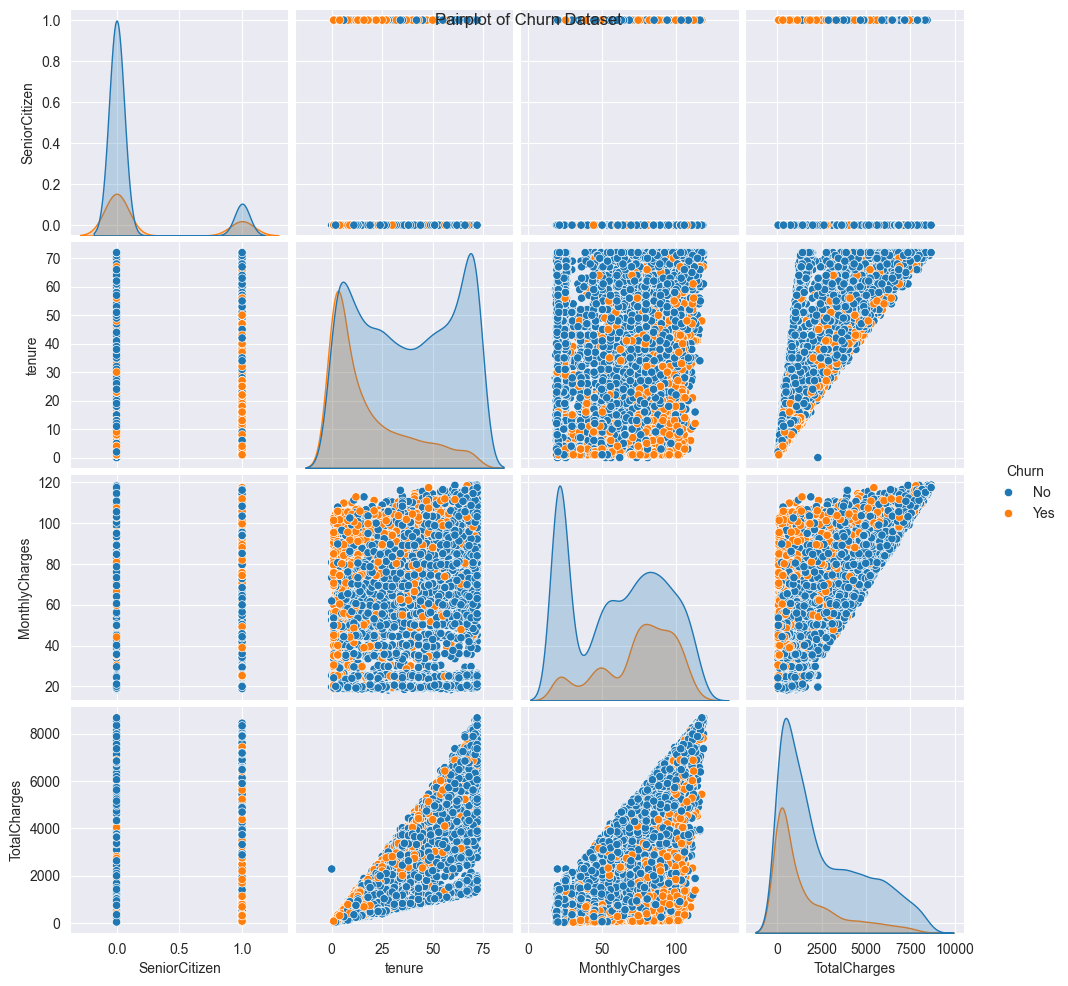

In [915]:
sns.pairplot(df, hue="Churn")
plt.suptitle('Pairplot of Churn Dataset')
plt.show()

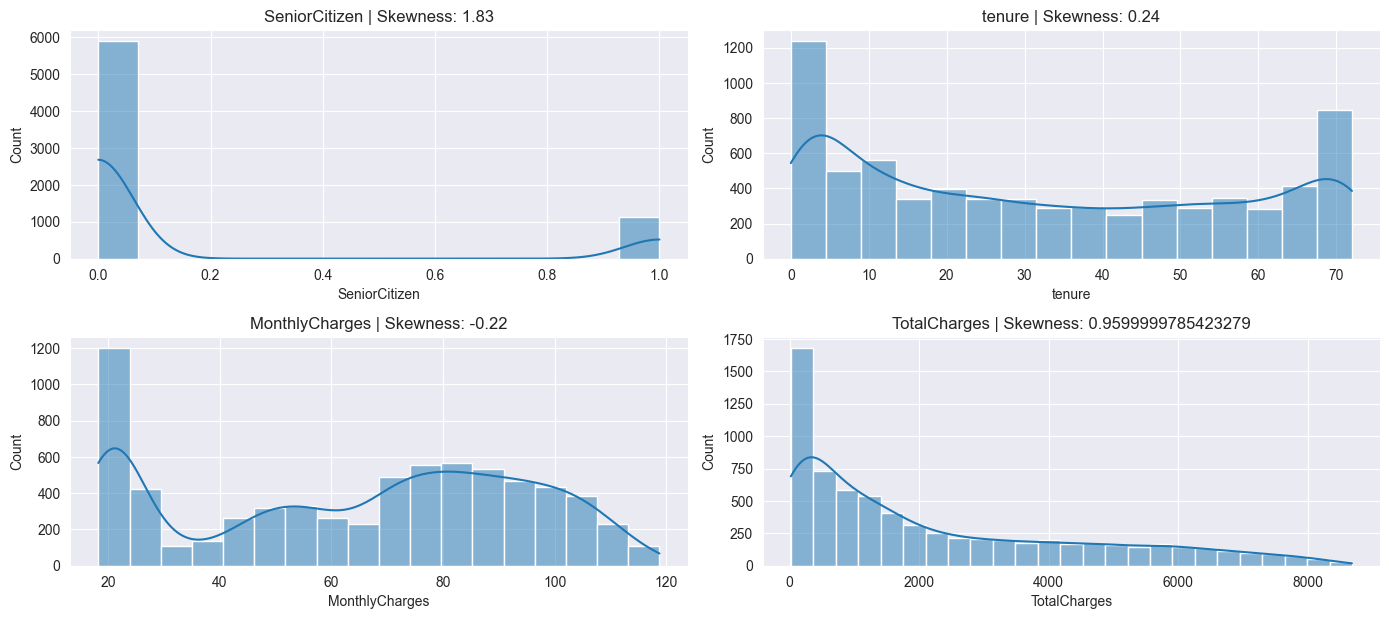

In [1547]:
# Histogram

sns.set_style("darkgrid")

plt.figure(figsize =(14, len(numerical)*3))
for idx, feature in enumerate(numerical, 1):
    plt.subplot(len(numerical), 2, idx)
    sns.histplot(df[feature], kde = True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

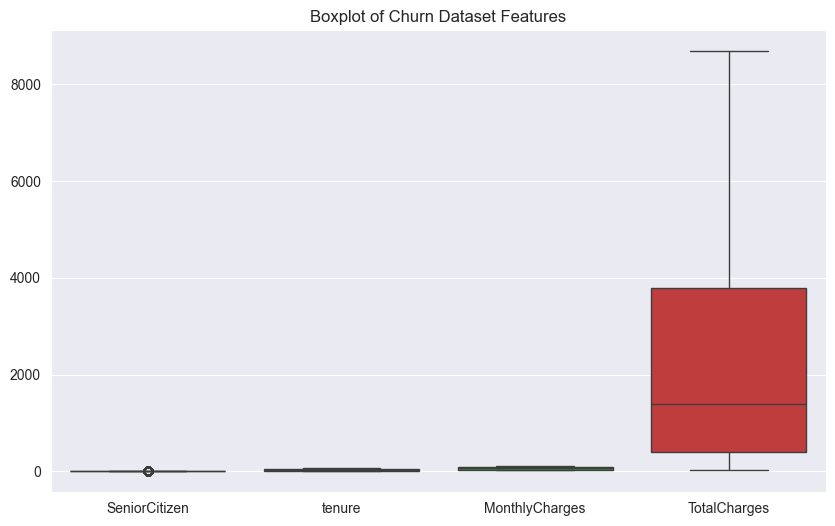

In [1548]:
# BoxPlot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical])
plt.title('Boxplot of Churn Dataset Features')
plt.show()

In [1546]:
correlation_matrix = df[numerical].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                 SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102396
tenure               0.016567  1.000000        0.247900      0.824761
MonthlyCharges       0.220173  0.247900        1.000000      0.650470
TotalCharges         0.102396  0.824761        0.650470      1.000000


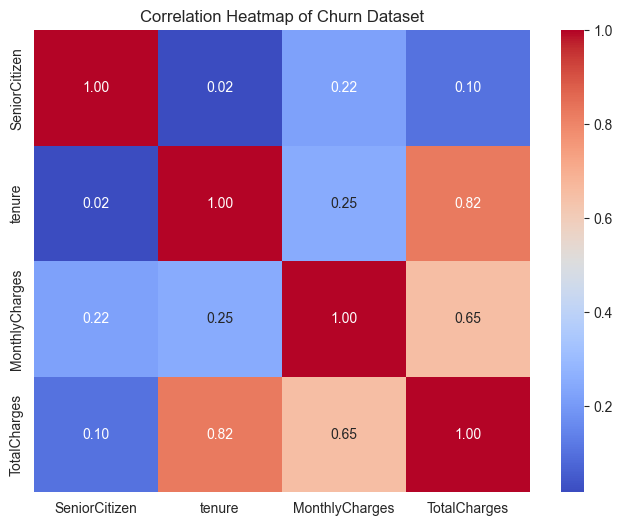

In [919]:
# Correlation between the features.

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Churn Dataset')
plt.show()

# Data PreProcessing

In [920]:
from sklearn.model_selection import train_test_split

In [921]:
class OHEncoder:
    def __init__(self):
        self.bag = {}
        self.n = 0

    def fit(self,df):
        for i in df.columns:
            for j in df[i].unique():
                if j not in self.bag.keys():
                    self.bag[j] = self.n
                    self.n+=1

        # for key in self.bag.keys():
        #     arr = np.zeros(self.n + 1).astype(int)
        #     arr[self.n - self.bag[key]] = 1
        #     self.bag[key] = arr

    def fit_transform(self,df):
        for i in df.columns:
            df[i] = df[i].map(self.bag).astype(int)

        return df

In [922]:
def normalize_abs(df):
    for i in df.columns:
        df.loc[:, i] = df[i].astype(float)
        df.loc[:, i] = df[i] / df[i].abs().max()

    return df

In [923]:
def normalize_max(df):
    for i in df.columns:
        df.loc[:, i] = df[i].astype(float)
        df.loc[:, i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

    return df

In [924]:
def normalize_std(df):
    for i in df.columns:
        df.loc[:, i] = df[i].astype(float)
        df.loc[:, i] = (df[i] - df[i].std()) / df[i].mean()

    return df

In [925]:
X = df[numerical.append(categorical[1:-1])]
y = df[categorical[-1]]

In [926]:
nenc = OHEncoder()

In [927]:
nenc.fit(X[categorical[1:-1]])

In [929]:
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = True

In [930]:
X[categorical[1:-1]] = nenc.fit_transform(X[categorical[1:-1]])

for i in categorical[1:-1]:
    X[i] = X[i].astype('int8')

In [931]:
X[categorical[1:-1]]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,2,3,3,4,5,3,2,3,3,3,3,8,2,11
1,1,3,3,2,3,5,2,3,2,3,3,3,9,3,12
2,1,3,3,2,3,5,2,2,3,3,3,3,8,2,12
3,1,3,3,3,4,5,2,3,2,2,3,3,9,3,13
4,0,3,3,2,3,6,3,3,3,3,3,3,8,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,2,2,2,5,2,3,2,2,2,2,9,2,12
7039,0,2,2,2,2,6,3,2,2,3,2,2,9,2,14
7040,0,2,2,3,4,5,2,3,3,3,3,3,8,2,11
7041,1,2,3,2,2,6,3,3,3,3,3,3,8,2,12


In [932]:
for x in categorical[1:-1]:
    print(f"{x}: {X[x].unique()}\n")

gender: [0 1]

Partner: [2 3]

Dependents: [3 2]

PhoneService: [3 2]

MultipleLines: [4 3 2]

InternetService: [5 6 3]

OnlineSecurity: [3 2 7]

OnlineBackup: [2 3 7]

DeviceProtection: [3 2 7]

TechSupport: [3 2 7]

StreamingTV: [3 2 7]

StreamingMovies: [3 2 7]

Contract: [ 8  9 10]

PaperlessBilling: [2 3]

PaymentMethod: [11 12 13 14]



In [933]:
X[numerical[1:]] = X[numerical[1:]].astype(float)
X[numerical[1:]] = normalize_std(X[numerical[1:]])

In [934]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,-0.727793,-0.003707,-0.978914,0,2,3,3,4,5,3,2,3,3,3,3,8,2,11
1,0,0.291634,0.414751,-0.164455,1,3,3,2,3,5,2,3,2,3,3,3,9,3,12
2,0,-0.696901,0.366883,-0.944622,1,3,3,2,3,5,2,2,3,3,3,3,8,2,12
3,0,0.631442,0.188537,-0.185806,1,3,3,3,4,5,2,3,2,2,3,3,9,3,13
4,0,-0.696901,0.627068,-0.925570,0,3,3,2,3,6,3,3,3,3,3,3,8,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.017283,0.844789,-0.120221,1,2,2,2,2,5,2,3,2,2,2,2,9,2,12
7039,0,1.465519,1.128907,2.232694,0,2,2,2,2,6,3,2,2,3,2,2,9,2,14
7040,0,-0.418875,-0.007567,-0.840255,0,2,2,3,4,5,2,3,3,3,3,3,8,2,11
7041,1,-0.635117,0.684200,-0.857708,1,2,3,2,2,6,3,3,3,3,3,3,8,2,12


In [935]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [936]:
X['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int8

# Classification Model

In [1862]:
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Input
from keras import regularizers
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

In [1450]:
def outputTransform(array):
    returnArray = []
    for i in range(len(array)):
        if array[i] >= 2.5:
            returnArray.append('No')
        else:
            returnArray.append('Yes')

    return returnArray

In [1500]:
def keras_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    
    # Convert probability predictions to class labels
    if y_pred.shape[1] > 1:  # Multiclass case (e.g., softmax)
        y_pred = np.argmax(y_pred, axis=1)
    else:  # Binary classification (sigmoid output)
        y_pred = (y_pred > 0.5).astype(int)

    return accuracy_score(y, y_pred)

In [1587]:
def output_format(y_pred):
    for i in range(len(y_pred)):
        if (y_pred[i][0]<=0.5):
            y_pred[i][0] = 0

        else:
            y_pred[i][0] = 1

    return y_pred

In [1866]:
class Classifier:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.y_pred = []
        self.model = []
        self.time = []
        self.model_description = []
        self.accuracy = []
        self.loss = []
        self.feature_importance = []
        self.precision_score = []
        self.f1_score = []
        self.recall_score = []

    def fit(self):
        #Logistic Regression
        self.model.append(LogisticRegression(max_iter = 2000, dual = False, fit_intercept = True, solver = 'newton-cholesky'))
        self.model_description.append("Logistic Regression")
        start = time.time()
        self.model[0].fit(self.X_train, self.y_train)
        end = time.time()
        self.time.append(end - start)
        self.y_pred.append(self.model[0].predict(self.X_test))
        self.accuracy.append(accuracy_score(self.y_test,self.y_pred[0]))
        self.loss.append("Does Not Exist")
        self.precision_score.append(precision_score(self.y_test, self.y_pred[0], average = 'weighted'))
        self.f1_score.append(f1_score(self.y_test, self.y_pred[0], average = 'weighted'))
        self.recall_score.append(recall_score(self.y_test, self.y_pred[0], average = 'weighted'))
        

        #Random Forest
        self.model.append(RandomForestClassifier(random_state = 42))
        self.model_description.append("Random Forest")
        start = time.time()
        self.model[1].fit(self.X_train, self.y_train)
        end = time.time()
        self.time.append(end - start)
        self.y_pred.append(self.model[1].predict(self.X_test))
        self.accuracy.append(accuracy_score(self.y_test,self.y_pred[1]))
        self.loss.append("Does Not Exist")
        self.precision_score.append(precision_score(self.y_test, self.y_pred[1], average = 'weighted'))
        self.f1_score.append(f1_score(self.y_test, self.y_pred[1], average = 'weighted'))
        self.recall_score.append(recall_score(self.y_test, self.y_pred[1], average = 'weighted'))

        #Gradient Boosted Machine(XGBoost)
        dtrain = self.y_train.map(nenc.bag)
        dtest = self.y_test.map(nenc.bag)
        dtrain = xgb.DMatrix(self.X_train, label = dtrain)
        dtest = xgb.DMatrix(self.X_test, label = dtest)
        start = time.time()
        self.model.append(xgb.train({}, dtrain))
        end = time.time()
        self.model_description.append("XGBoost")
        self.time.append(end - start)
        self.y_pred.append(self.model[2].predict(dtest))
        self.y_pred[2] = outputTransform(self.y_pred[2])
        self.accuracy.append(accuracy_score(self.y_test,self.y_pred[2]))
        self.loss.append("Does Not Exist")
        self.precision_score.append(precision_score(self.y_test, self.y_pred[2], average = 'weighted'))
        self.f1_score.append(f1_score(self.y_test, self.y_pred[2], average = 'weighted'))
        self.recall_score.append(recall_score(self.y_test, self.y_pred[2], average = 'weighted'))

        #Support Vector Machine(SVM)
        self.model.append(SVC(kernel="rbf"))
        self.model_description.append("Support Vector Machine")
        start = time.time()
        self.model[3].fit(self.X_train, self.y_train)
        end = time.time()
        self.time.append(end - start)
        self.y_pred.append(self.model[3].predict(self.X_test))
        self.accuracy.append(accuracy_score(self.y_test,self.y_pred[3]))
        self.loss.append("Does Not Exist")
        self.precision_score.append(precision_score(self.y_test, self.y_pred[3], average = 'weighted'))
        self.f1_score.append(f1_score(self.y_test, self.y_pred[3], average = 'weighted'))
        self.recall_score.append(recall_score(self.y_test, self.y_pred[3], average = 'weighted'))

        #FeedForward Neural Network: Multi Layer Perceptron(MLP)
        self.model.append(Sequential([
            Input(shape = (self.X_train.shape[1],)),
            Dense(64, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
            Dropout(0.3),
            Dense(32, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
            Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.01)),
            Dense(1, activation = "sigmoid", kernel_regularizer = regularizers.l2(0.01)),
        ]))
        self.model[4].compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
        self.model_description.append("MLP")
        start = time.time()
        self.model[4].fit(self.X_train, self.y_train.map({'No':0, 'Yes':1}), epochs = 10, batch_size = 16, validation_split = 0.2)
        end = time.time()
        self.time.append(end - start)
        loss, accuracy = self.model[4].evaluate(self.X_test, self.y_test.map({'No':0, 'Yes':1}))
        self.y_pred.append(self.model[4].predict(self.X_test))
        self.y_pred[4] = output_format(self.y_pred[4])
        self.accuracy.append(accuracy)
        self.loss.append(loss)
        self.precision_score.append(precision_score(self.y_test.map({'No':0, 'Yes':1}), self.y_pred[4], average = 'weighted'))
        self.f1_score.append(f1_score(self.y_test.map({'No':0, 'Yes':1}), self.y_pred[4], average = 'weighted'))
        self.recall_score.append(recall_score(self.y_test.map({'No':0, 'Yes':1}), self.y_pred[4], average = 'weighted'))

    def get_features(self, index = -1):
        #Logistic Regression
        if ((index == 0) or (index == -1)):
            self.feature_importance.append(self.model[0].coef_[0])
            self.feature_importance[0] = pd.DataFrame({'Features of Logistic Regression': self.X_train.columns, "Importance": np.abs(self.feature_importance[0])})
            self.feature_importance[0] = self.feature_importance[0].sort_values('Importance', ascending = True)
            self.feature_importance[0].plot(x = 'Features of Logistic Regression', y = 'Importance', kind = 'barh', figsize = (10, 6))

        #Random Forest
        if ((index == 1) or (index == -1)):
            self.feature_importance.append(self.model[1].feature_importances_)
            self.feature_importance[1] = pd.DataFrame({'Features of Random Forest': self.X_train.columns, 'Importance': self.feature_importance[1]})
            self.feature_importance[1] = self.feature_importance[1].sort_values('Importance', ascending = True)
            self.feature_importance[1].plot(x = 'Features of Random Forest', y = 'Importance', kind = 'barh', figsize = (10,6))

        #XGBoost
        if ((index == 2) or (index == -1)):
            self.feature_importance.append(self.model[2].get_score(importance_type='weight'))
            self.feature_importance[2] = pd.DataFrame({'Features of XGBoost': list(self.feature_importance[2].keys()), 'Importance': list(self.feature_importance[2].values())})
            self.feature_importance[2] = self.feature_importance[2].sort_values('Importance', ascending = True)
            self.feature_importance[2].plot(x = 'Features of XGBoost', y = 'Importance', kind = 'barh', figsize = (10,6))

        #SVM
        if ((index == 3) or (index == -1)):
            self.feature_importance.append(permutation_importance(self.model[3], self.X_test, self.y_test, random_state = 42))
            self.feature_importance[3] = pd.DataFrame({'Features of SVM': self.X_train.columns, "Importance": model.feature_importance[3].importances_mean})
            self.feature_importance[3] = self.feature_importance[3].sort_values('Importance', ascending = True)
            self.feature_importance[3].plot(x = 'Features of SVM', y = 'Importance', kind = 'barh', figsize = (10, 6))

        #MLP
        if ((index == 4) or (index == -1)):
            self.feature_importance.append(permutation_importance(self.model[4], self.X_test, self.y_test.map({'No':0, 'Yes':1}), scoring = keras_scorer, random_state = 42))
            self.feature_importance[4] = pd.DataFrame({'Features of MLP': self.X_train.columns, "Importance": model.feature_importance[4].importances_mean})
            self.feature_importance[4] = self.feature_importance[4].sort_values('Importance', ascending = True)
            self.feature_importance[4].plot(x = 'Features of MLP', y = 'Importance', kind = 'barh', figsize = (10, 6))

    def evaluate(self):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(list(map(list, zip(*[self.accuracy, self.time, self.precision_score, self.recall_score, self.f1_score]))), annot = True, cmap = "coolwarm", xticklabels = ['Accuracy', 'Time', 'Precision', 'Recall', 'F1 Score'], yticklabels = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'MLP'], ax = ax)
        ax.xaxis.tick_top()
        ax.tick_params(axis='x', rotation=0)
        plt.show()

    def confusion_matrix(self, index = -1):
        #Logistic Regression
        if ((index == 0) or (index == -1)):
            ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(self.y_test, self.y_pred[0]), display_labels = [0, 1]).plot()
            plt.title('Confusion Matrix of Logistic Regression')
            plt.show

        #Random Forest
        if ((index == 1) or (index == -1)):
            ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(self.y_test, self.y_pred[1]), display_labels = [0, 1]).plot()
            plt.title('Confusion Matrix of Random Forest')
            plt.show

        #XGBoost
        if ((index == 2) or (index == -1)):
            ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(self.y_test, self.y_pred[2]), display_labels = [0, 1]).plot()
            plt.title('Confusion Matrix of XGBoost')
            plt.show

        #SVM
        if ((index == 3) or (index == -1)):
            ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(self.y_test, self.y_pred[3]), display_labels = [0, 1]).plot()
            plt.title('Confusion Matrix of SVM')
            plt.show

        #MLP
        if ((index == 4) or (index == -1)):
            ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(self.y_test.map({'No':0, 'Yes':1}), self.y_pred[4]), display_labels = [0, 1]).plot()
            plt.title('Confusion Matrix of MLP')
            plt.show
        

In [1867]:
model = Classifier(X_train, y_train, X_test, y_test)

In [1868]:
model.fit()

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6720 - loss: 1.3784 - val_accuracy: 0.7933 - val_loss: 0.8397
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7484 - loss: 0.8242 - val_accuracy: 0.7941 - val_loss: 0.6679
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7758 - loss: 0.6724 - val_accuracy: 0.7693 - val_loss: 0.6027
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7769 - loss: 0.6077 - val_accuracy: 0.8021 - val_loss: 0.5469
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.7765 - loss: 0.5773 - val_accuracy: 0.8030 - val_loss: 0.5215
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7814 - loss: 0.5472 - val_accuracy: 0.7915 - val_loss: 0.5079
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7840 - loss: 0.5342 - val_accuracy: 0.7826 - val_loss: 0.5088
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.7827 - loss: 0.5291 - va

In [1870]:
model.accuracy[0]

0.8190205819730305

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
45/45 ━━━━━━━━━━

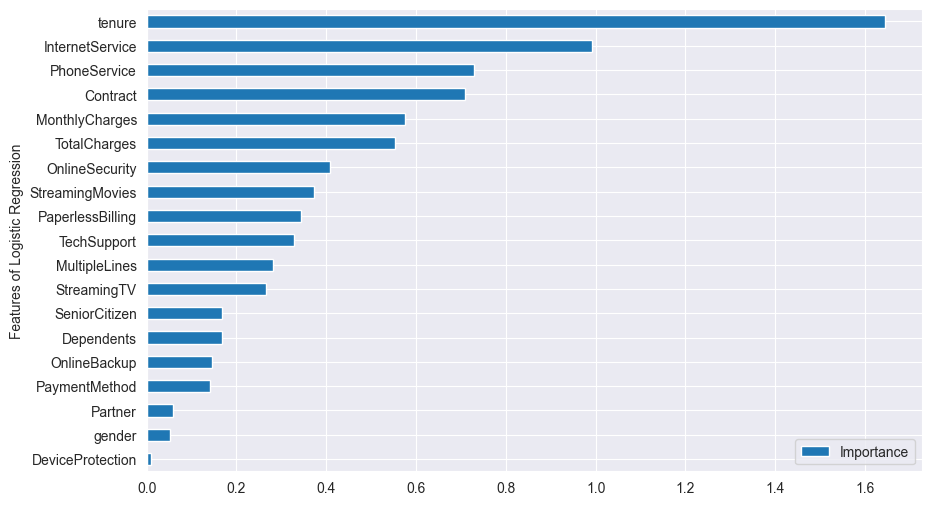

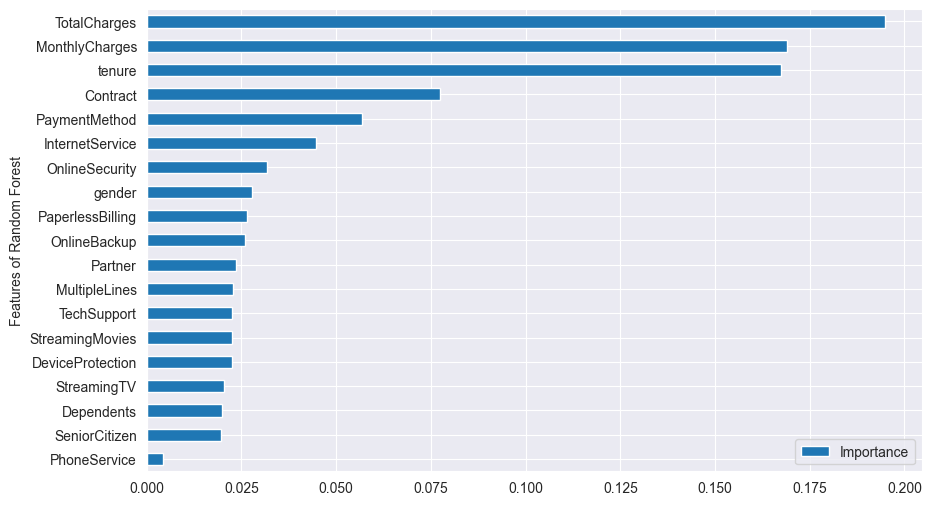

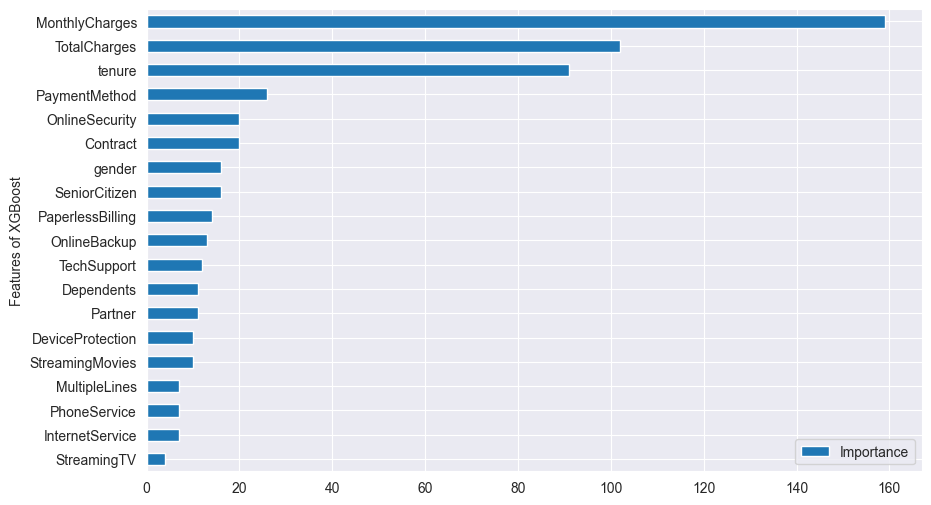

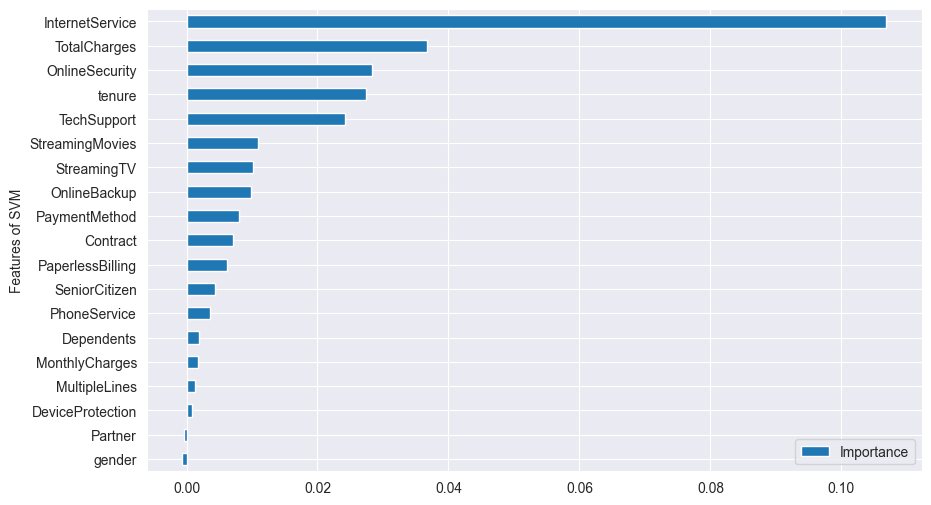

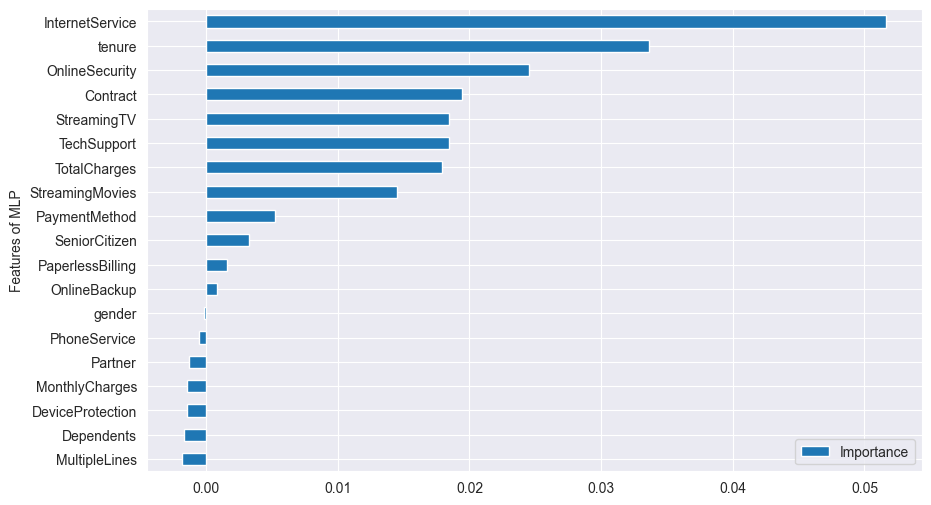

In [1871]:
model.get_features()

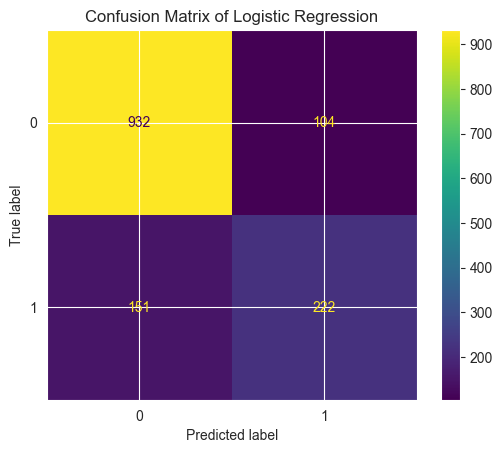

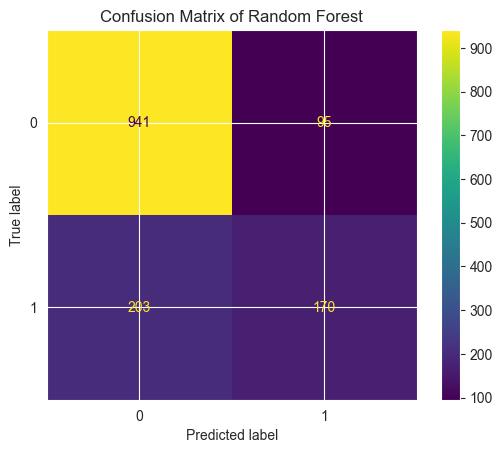

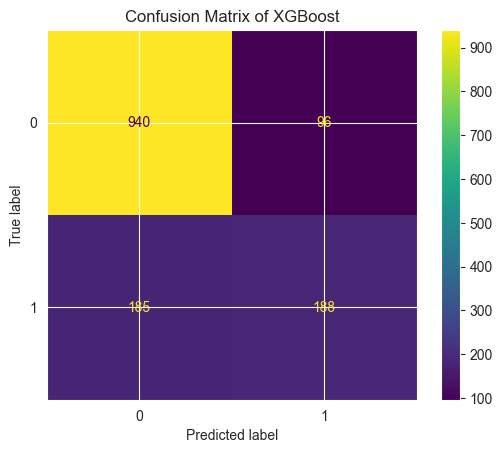

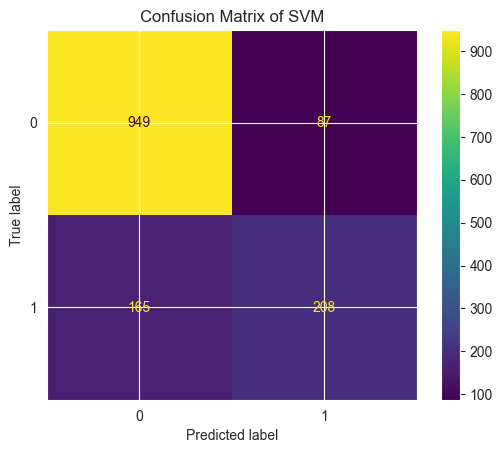

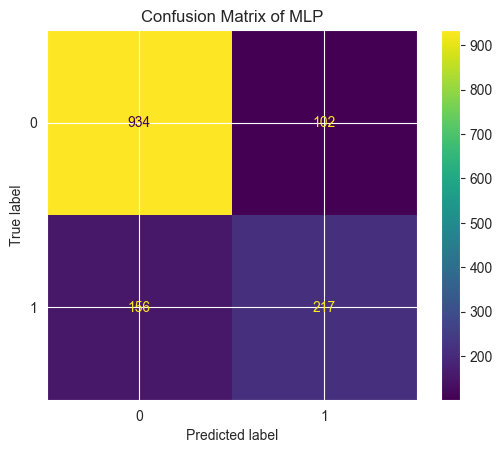

In [1872]:
model.confusion_matrix()

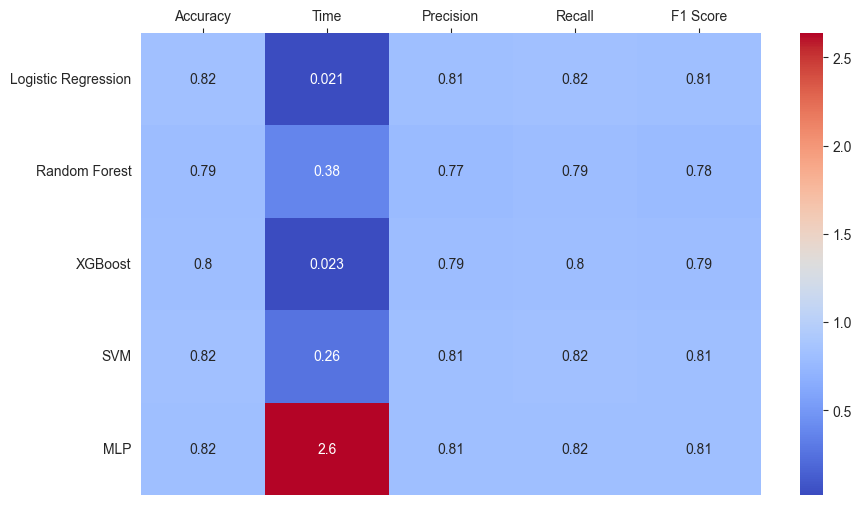

In [1873]:
model.evaluate()

In [1876]:
df.groupby("tenure")["Churn"].mean()

TypeError: agg function failed [how->mean,dtype->object]